In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
url= "/content/drive/MyDrive/Datasets/alilabelled2.csv"
data= pd.read_csv(url)
data

,productId,author,country,rating,content,date,label
0,1.010000e+15,Mr. Julius Simonis,ES,5,"All right, with sellers like that it's still a...",12/12/2022,1
1,1.010000e+15,Mrs. Otis Schamberger,LV,5,OK.,12/12/2022,1
2,1.010000e+15,Brandy Wolf,PL,5,all OK,12/12/2022,1
3,1.010000e+15,Mrs. Lester Macejkovic,SK,4,The actual cells capacity is in the range of 3...,9/21/2022,1
4,1.010000e+15,Joann Wiza,US,3,The listing showed 1000 mAh batteries were bei...,10/23/2022,1
...,...,...,...,...,...,...,...
29549,2.255800e+15,Freda Swift,US,4,Just like the description you need to use them...,11/26/2022,0
29550,2.255800e+15,Antonia Flatley,US,5,In love with my boots!,12/8/2022,1
29551,2.255800e+15,Deanna Marvin,US,2,The pair didn't match. The left is a few centi...,10/3/2022,1
29552,2.255800e+15,Sherry Gislason,US,2,The size in the shoes is incorrect. At least 3...,2/22/2023,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29554 entries, 0 to 29553
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   productId  29554 non-null  float64
 1   author     29554 non-null  object 
 2   country    29553 non-null  object 
 3   rating     29554 non-null  int64  
 4   content    29554 non-null  object 
 5   date       29554 non-null  object 
 6   label      29554 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [ ]:
# Check the Null Values 
data.isnull().sum()

productId    0
author       0
country      1
rating       0
content      0
date         0
label        0
dtype: int64

In [ ]:
# value of 1 in the attribute LABEL is considered as Not-Spam or Genuine reviews. Whereas value -1 means a fake or SPAM review
data['label'].unique()

array([1, 0])

In [ ]:
positive = data[data['label'] == 1]
p = len(positive)
negative = data[data['label'] == 0]
n = len(negative)
print('The number of positive review is {} and negative review is {}'.format(p,n))

rat1 = len(data[data['rating']==1])
rat2 = len(data[data['rating']==2])
rat3 = len(data[data['rating']==3])
rat4 = len(data[data['rating']==4])
rat5 = len(data[data['rating']==5])
print('{} ratings = 1'.format(rat1))
print('{} ratings = 2'.format(rat2))
print('{} ratings = 3'.format(rat3))
print('{} ratings = 4'.format(rat4))
print('{} ratings = 5'.format(rat5))

The number of positive review is 26128 and negative review is 3426
520 ratings = 1
157 ratings = 2
433 ratings = 3
1722 ratings = 4
26722 ratings = 5


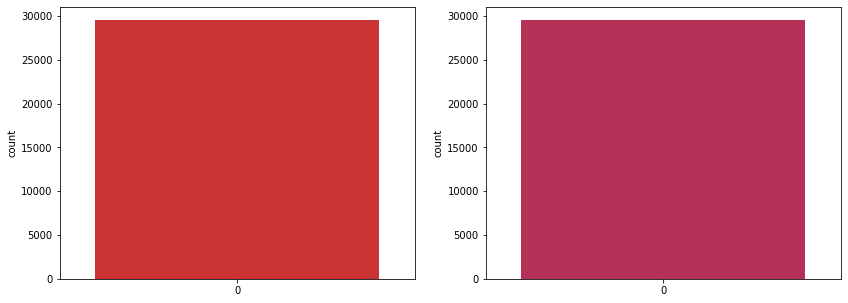

In [ ]:
import matplotlib.pyplot as plt #plotting
import seaborn as sns

fig_dims= (14,5)
fig, ax = plt.subplots(1,2, figsize=fig_dims)

sns.countplot(data['label'], palette='Set1', ax=ax[0])
sns.countplot(data['rating'], palette='rocket', ax=ax[1])
fig.show()

In [ ]:
data['length'] = data['content'].apply(len)
data

,productId,author,country,rating,content,date,label,length
0,1.010000e+15,Mr. Julius Simonis,ES,5,"All right, with sellers like that it's still a...",12/12/2022,1,106
1,1.010000e+15,Mrs. Otis Schamberger,LV,5,OK.,12/12/2022,1,3
2,1.010000e+15,Brandy Wolf,PL,5,all OK,12/12/2022,1,6
3,1.010000e+15,Mrs. Lester Macejkovic,SK,4,The actual cells capacity is in the range of 3...,9/21/2022,1,157
4,1.010000e+15,Joann Wiza,US,3,The listing showed 1000 mAh batteries were bei...,10/23/2022,1,206
...,...,...,...,...,...,...,...,...
29549,2.255800e+15,Freda Swift,US,4,Just like the description you need to use them...,11/26/2022,0,68
29550,2.255800e+15,Antonia Flatley,US,5,In love with my boots!,12/8/2022,1,22
29551,2.255800e+15,Deanna Marvin,US,2,The pair didn't match. The left is a few centi...,10/3/2022,1,368
29552,2.255800e+15,Sherry Gislason,US,2,The size in the shoes is incorrect. At least 3...,2/22/2023,1,76


Text(0.5, 1.0, 'Frequency for the lengths of reviews')

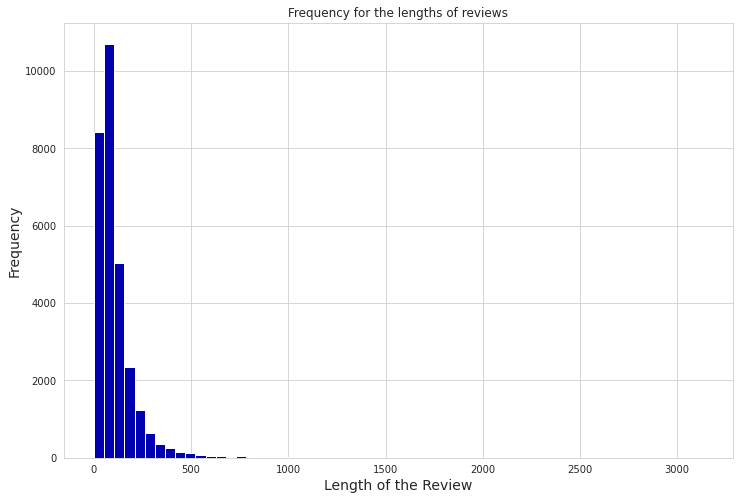

In [ ]:
sns.set_palette("seismic") 
sns.set_style("whitegrid") 
data['length'].plot(bins = 60, kind = 'hist', figsize=(12,8))
plt.xlabel("Length of the Review", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Frequency for the lengths of reviews")

In [ ]:
sentences = data['content'].tolist()
len(sentences)

29554

In [ ]:
sentences_str = ' '.join(sentences)
sentences_str[:1000]

"All right, with sellers like that it's still a pleasure to buy on Aliexpress. Recommended seller, 5 stars. OK. all OK The actual cells capacity is in the range of 310 - 330 mAh, internal resistance of cells is in the range of 75 - 85mOhm tested by LiitoKala Lii-600 at 250mA. The listing showed 1000 mAh batteries were being sold. The delivery had 350 mAh batteries sent instead. That is a big difference in product, only a third of the purchase. It has caused a loss to this buyer. I received everything perfectly 10 days faster than the stated one. We'll check in tomorrow, thank you. Perfect original battery Leica, excellent product quality, recommend. Very good, the product I needed arrived right Perfect originals and everything! With your serial number It's okay Completely disillusioned. the clock arrived with the broken glass I like very good quality I recommend He's exactly fake. Nothing to say Received my one can on it Unfortunately zwabbert the big hand back and forth. See also the 

In [ ]:
len(sentences_str)

3192966

In [ ]:
data.groupby(data['label'].apply(lambda x: '0' if x <= 0 else '1'))['label'].count()

label
0     3426
1    26128
Name: label, dtype: int64

In [ ]:
data['rating'].value_counts()

5    26722
4     1722
1      520
3      433
2      157
Name: rating, dtype: int64

In [ ]:
normalized_true_df = data.loc[data['label'].isin([1])].head(70000)
normalized_true_df

,productId,author,country,rating,content,date,label,length
0,1.010000e+15,Mr. Julius Simonis,ES,5,"All right, with sellers like that it's still a...",12/12/2022,1,106
1,1.010000e+15,Mrs. Otis Schamberger,LV,5,OK.,12/12/2022,1,3
2,1.010000e+15,Brandy Wolf,PL,5,all OK,12/12/2022,1,6
3,1.010000e+15,Mrs. Lester Macejkovic,SK,4,The actual cells capacity is in the range of 3...,9/21/2022,1,157
4,1.010000e+15,Joann Wiza,US,3,The listing showed 1000 mAh batteries were bei...,10/23/2022,1,206
...,...,...,...,...,...,...,...,...
29548,2.255800e+15,Raymond Dicki,US,5,Second time I order. Great goods!,10/10/2022,1,33
29550,2.255800e+15,Antonia Flatley,US,5,In love with my boots!,12/8/2022,1,22
29551,2.255800e+15,Deanna Marvin,US,2,The pair didn't match. The left is a few centi...,10/3/2022,1,368
29552,2.255800e+15,Sherry Gislason,US,2,The size in the shoes is incorrect. At least 3...,2/22/2023,1,76


In [ ]:
normalized_fake_df = data.loc[data['label'].isin([0])].tail(10000)
normalized_fake_df

,productId,author,country,rating,content,date,label,length
8,1.010000e+15,Wendell Krajcik,ES,5,Perfect originals and everything! With your se...,12/5/2022,0,57
9,1.010000e+15,Charlie McKenzie,ES,5,It's okay,1/20/2023,0,9
13,1.010000e+15,Gerald Dooley,FR,3,Nothing to say,1/19/2023,0,14
27,1.010000e+15,Elaine Wyman,AR,3,Very good response from the seller,1/19/2023,0,34
28,1.010000e+15,Alfredo Kautzer,NL,3,it is not what we expected,1/19/2023,0,26
...,...,...,...,...,...,...,...,...
29502,3.256800e+15,Priscilla Purdy,RU,5,"All as in the picture. After use, I will write",9/23/2022,0,46
29518,3.256800e+15,Janet Hintz,RU,5,It went to the Leningrad region for more than ...,9/13/2022,0,105
29524,3.256800e+15,Joann Hammes,KZ,5,"Like everything in the description, but not ye...",9/28/2022,0,80
29531,3.256800e+15,Sidney Oberbrunner,RU,4,"Ooooo very long delivery, 2 months. Haven't tr...",1/11/2023,0,56


In [ ]:
combined = [normalized_true_df, normalized_fake_df]
  
normalized_df = pd.concat(combined)
normalized_df

,productId,author,country,rating,content,date,label,length
0,1.010000e+15,Mr. Julius Simonis,ES,5,"All right, with sellers like that it's still a...",12/12/2022,1,106
1,1.010000e+15,Mrs. Otis Schamberger,LV,5,OK.,12/12/2022,1,3
2,1.010000e+15,Brandy Wolf,PL,5,all OK,12/12/2022,1,6
3,1.010000e+15,Mrs. Lester Macejkovic,SK,4,The actual cells capacity is in the range of 3...,9/21/2022,1,157
4,1.010000e+15,Joann Wiza,US,3,The listing showed 1000 mAh batteries were bei...,10/23/2022,1,206
...,...,...,...,...,...,...,...,...
29502,3.256800e+15,Priscilla Purdy,RU,5,"All as in the picture. After use, I will write",9/23/2022,0,46
29518,3.256800e+15,Janet Hintz,RU,5,It went to the Leningrad region for more than ...,9/13/2022,0,105
29524,3.256800e+15,Joann Hammes,KZ,5,"Like everything in the description, but not ye...",9/28/2022,0,80
29531,3.256800e+15,Sidney Oberbrunner,RU,4,"Ooooo very long delivery, 2 months. Haven't tr...",1/11/2023,0,56


In [ ]:
reviews = data.drop(['productId', 'author', 'country', 'rating', 'date', 'length'], axis = 1)
reviews

,content,label
0,"All right, with sellers like that it's still a...",1
1,OK.,1
2,all OK,1
3,The actual cells capacity is in the range of 3...,1
4,The listing showed 1000 mAh batteries were bei...,1
...,...,...
29549,Just like the description you need to use them...,0
29550,In love with my boots!,1
29551,The pair didn't match. The left is a few centi...,1
29552,The size in the shoes is incorrect. At least 3...,1


In [ ]:
# Shuffling a Pandas dataframe with .shuffle()
reviews = reviews.sample(frac=1)
reviews

,content,label
2688,"Headphones correspond to the price, delivery f...",1
24946,"Perfect, big bags!",1
3133,Looks good quality but there must be a color e...,1
18268,Pencil came broken,1
21740,"Order decorated 15.09., received 27.10. Russia...",1
...,...,...
19652,Thank you! Super! Lights up pretty good room 3...,1
24147,Product check with the description of the ad. ...,1
19061,Parcel received thank you. Corresponds to the ...,1
20425,"Product I will describe it, it was given by Sh...",0


In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
import re
import string 
from bs4 import BeautifulSoup 

def clean_text(text):
    text = str(text).lower()
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('https?://\S+|www\.com\S+', '', text)
    text = re.sub('¯ツ¯', '', text)    
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Remove any non-ASCII characters (i.e., non-English characters)
    text = BeautifulSoup(text, "html.parser")
    text = text.get_text(separator='')

    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text = re.sub('\n', '', text)
    text = re.sub('\t', '', text)
    text = re.sub('[0-9]+', '', text) # only numeric values
    
    text= re.sub('\s+', ' ', text) # Remove whitespaces

    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
reviews['content'] = reviews['content'].apply(lambda x:clean_text(x))
reviews

<ipython-input-20-e8c05bdd1004>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser")


,content,label
2688,headphones correspond to the price delivery fa...,1
24946,perfect big bags,1
3133,looks good quality but there must be a color e...,1
18268,pencil came broken,1
21740,order decorated received russian post office g...,1
...,...,...
19652,thank you super lights up pretty good room m i...,1
24147,product check with the description of the ad i...,1
19061,parcel received thank you corresponds to the d...,1
20425,product i will describe it it was given by shv...,0


In [ ]:
reviews['content'] = reviews.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)
reviews

,content,label
2688,"[headphones, correspond, to, the, price, deliv...",1
24946,"[perfect, big, bags]",1
3133,"[looks, good, quality, but, there, must, be, a...",1
18268,"[pencil, came, broken]",1
21740,"[order, decorated, received, russian, post, of...",1
...,...,...
19652,"[thank, you, super, lights, up, pretty, good, ...",1
24147,"[product, check, with, the, description, of, t...",1
19061,"[parcel, received, thank, you, corresponds, to...",1
20425,"[product, i, will, describe, it, it, was, give...",0


In [ ]:
# download stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
reviews['content'] = reviews['content'].apply(lambda x: remove_stopwords(x))
reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,label
2688,"[headphones, correspond, price, delivery, fast...",1
24946,"[perfect, big, bags]",1
3133,"[looks, good, quality, must, color, error, rec...",1
18268,"[pencil, came, broken]",1
21740,"[order, decorated, received, russian, post, of...",1
...,...,...
19652,"[thank, super, lights, pretty, good, room, han...",1
24147,"[product, check, description, ad, recommend]",1
19061,"[parcel, received, thank, corresponds, descrip...",1
20425,"[product, describe, given, shvidko]",0


In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

reviews['content'] = reviews['content'].apply(lambda x: lemmatizer(x))
reviews

,content,label
2688,"[headphone, correspond, price, delivery, fast,...",1
24946,"[perfect, big, bag]",1
3133,"[look, good, quality, must, color, error, rece...",1
18268,"[pencil, came, broken]",1
21740,"[order, decorated, received, russian, post, of...",1
...,...,...
19652,"[thank, super, light, pretty, good, room, hang...",1
24147,"[product, check, description, ad, recommend]",1
19061,"[parcel, received, thank, corresponds, descrip...",1
20425,"[product, describe, given, shvidko]",0


In [ ]:
def detokenize_words(text):
    text = TreebankWordDetokenizer().detokenize(text)
    return text

reviews['content'] = reviews['content'].apply(detokenize_words)
reviews

,content,label
2688,headphone correspond price delivery fast selle...,1
24946,perfect big bag,1
3133,look good quality must color error received re...,1
18268,pencil came broken,1
21740,order decorated received russian post office g...,1
...,...,...
19652,thank super light pretty good room hang lamp t...,1
24147,product check description ad recommend,1
19061,parcel received thank corresponds description ...,1
20425,product describe given shvidko,0


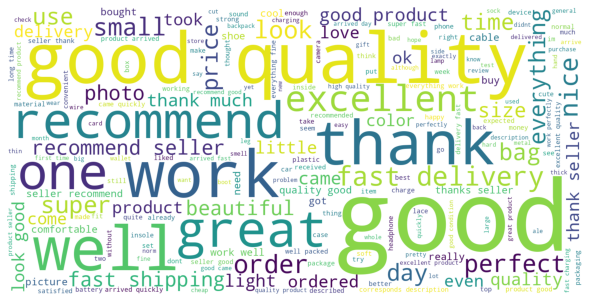

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example text data
text = ' '.join(reviews[reviews['label'] == 1]['content'].values)

# Create a WordCloud object with the text data
wordcloud = WordCloud(width=1600, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

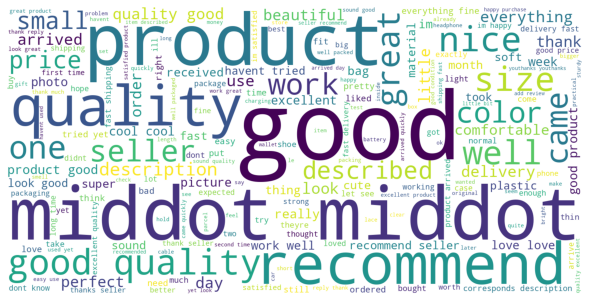

In [ ]:
# Example text data
text = ' '.join(reviews[reviews['label'] == 0]['content'].values)

# Create a WordCloud object with the text data
wordcloud = WordCloud(width=1600, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Shuffling a Pandas dataframe with .shuffle()
shuffled = reviews.sample(frac=1)
shuffled

,content,label
1542,excellent quality product little bit delly del...,1
3223,order shipped fast well packaged thank great s...,0
19322,hi cool feeder whole thing delivery pumped nov...,1
3531,third purchase awesome product work properly a...,1
2139,thanks,1
...,...,...
9626,great quality durability use different device ...,1
12742,well received product copy original nothing sa...,1
21834,great novgorod lamp came two week thanks much ...,1
18638,good day delivery super thanks good year,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Xm = reviews["content"]
ym = reviews["label"]
Xm_train, Xm_test, ym_train, ym_test=train_test_split(Xm,ym,test_size=.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectrorization = TfidfVectorizer()
xv_train = vectrorization.fit_transform(Xm_train)
xv_test = vectrorization.transform(Xm_test)

In [ ]:
corpus = ['good quality good price',
          'product looks good works fine' ]
words_set = set()

for doc in  corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))
    
print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)

Number of words in the corpus: 7
The words in the corpus: 
 {'looks', 'product', 'price', 'good', 'quality', 'fine', 'works'}


In [ ]:
n_docs = len(corpus)         #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the 

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_set)

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # Words in the document
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))
        
df_tf

,looks,product,price,good,quality,fine,works
0,0.0,0.0,0.25,0.5,0.25,0.0,0.0
1,0.2,0.2,0.00,0.2,0.00,0.2,0.2


In [ ]:
print("IDF of: ")

idf = {}

for w in words_set:
    k = 0    # number of documents in the corpus that contain this word
    
    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1
            
    idf[w] =  np.log10(n_docs / k)
    
    print(f'{w:>15}: {idf[w]:>10}' )
    

IDF of: 
          looks: 0.3010299956639812
        product: 0.3010299956639812
          price: 0.3010299956639812
           good:        0.0
        quality: 0.3010299956639812
           fine: 0.3010299956639812
          works: 0.3010299956639812


In [ ]:
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]
        
df_tf_idf

,looks,product,price,good,quality,fine,works
0,0.000000,0.000000,0.075257,0.0,0.075257,0.000000,0.000000
1,0.060206,0.060206,0.000000,0.0,0.000000,0.060206,0.060206


In [ ]:
# from scipy.sparse import vstack

# # Vertically stack the two sparse matrices
# xv_combined = vstack([xv_train, xv_test])

# # Convert the sparse matrix to a DataFrame
# df_combined = pd.DataFrame(xv_combined.toarray(), columns=vectrorization.get_feature_names_out())

# # Export the DataFrame to a CSV file
# df_combined.to_csv('combined_tfidf.csv', index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
import time
import warnings
warnings.filterwarnings('ignore')
# get the start time
st = time.time()
LR = LogisticRegression()
LR.fit(xv_train,ym_train)
Y_pred_lr = LR.predict(xv_test)



# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 1.157804250717163 seconds


In [ ]:
print(classification_report(ym_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.64      0.05      0.09       840
           1       0.89      1.00      0.94      6549

    accuracy                           0.89      7389
   macro avg       0.77      0.52      0.52      7389
weighted avg       0.86      0.89      0.84      7389



In [ ]:
score_lr = round(accuracy_score(ym_test,Y_pred_lr)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.88 %


In [ ]:
from sklearn import svm
import time
# get the start time
st = time.time()

SVM = svm.SVC(kernel='linear')
SVM.fit(xv_train,ym_train)
Y_pred_svm = SVM.predict(xv_test)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 58.2532262802124 seconds


In [ ]:
print(classification_report(ym_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.75      0.01      0.03       840
           1       0.89      1.00      0.94      6549

    accuracy                           0.89      7389
   macro avg       0.82      0.51      0.48      7389
weighted avg       0.87      0.89      0.84      7389



In [ ]:
score_svm = round(accuracy_score(ym_test,Y_pred_svm)*100,2)

print("The accuracy score achieved using Support Vector Machine is: "+str(score_svm)+" %")

The accuracy score achieved using Support Vector Machine is: 88.74 %


In [ ]:
from sklearn.naive_bayes import MultinomialNB
import time

# get the start time
st = time.time()
NB = MultinomialNB()
NB.fit(xv_train,ym_train)
Y_pred_nb = NB.predict(xv_test)


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.01480245590209961 seconds


In [ ]:
print(classification_report(ym_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       840
           1       0.89      1.00      0.94      6549

    accuracy                           0.89      7389
   macro avg       0.44      0.50      0.47      7389
weighted avg       0.79      0.89      0.83      7389



In [ ]:
score_nb = round(accuracy_score(ym_test,Y_pred_nb)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 88.59 %


In [ ]:
import xgboost as xgb
import time
# get the start time
st = time.time()
XGB = xgb.XGBClassifier()
XGB.fit(xv_train,ym_train)
Y_pred_xgb = XGB.predict(xv_test)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 11.039963245391846 seconds


In [ ]:
print(classification_report(ym_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.70      0.13      0.22       840
           1       0.90      0.99      0.94      6549

    accuracy                           0.89      7389
   macro avg       0.80      0.56      0.58      7389
weighted avg       0.88      0.89      0.86      7389



In [ ]:
score_xgb = round(accuracy_score(ym_test, Y_pred_xgb)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 89.5 %


In [ ]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import time

clf = RandomForestClassifier(n_estimators = 50)  
# get the start time
st = time.time()
# fit function is used to train the model using the training sets as parameters
clf.fit(xv_train, ym_train)
  
# performing predictions on the test dataset
y_pred_ran = clf.predict(xv_test)



# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
  

Execution time: 19.52481484413147 seconds


In [ ]:
print(classification_report(ym_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.76      0.30      0.43       840
           1       0.92      0.99      0.95      6549

    accuracy                           0.91      7389
   macro avg       0.84      0.64      0.69      7389
weighted avg       0.90      0.91      0.89      7389



In [ ]:
score_ran = round(accuracy_score(ym_test, y_pred_ran)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_ran)+" %")

The accuracy score achieved using Random Forest is: 90.95 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
import time
# n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
# metric='minkowski': This is the default parameter and it decides the distance between the points.
# p=2: It is equivalent to the standard Euclidean metric. 
# get the start time
st = time.time()
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(xv_train,ym_train)
Y_pred_knn = classifier.predict(xv_test)



# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 31.273296117782593 seconds


In [ ]:
print(classification_report(ym_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.47      0.18      0.27       840
           1       0.90      0.97      0.94      6549

    accuracy                           0.88      7389
   macro avg       0.69      0.58      0.60      7389
weighted avg       0.85      0.88      0.86      7389



In [ ]:
score_knn = round(accuracy_score(ym_test, Y_pred_knn)*100,2)

print("The accuracy score achieved using K-nearest Neighbour is: "+str(score_knn)+" %")

The accuracy score achieved using K-nearest Neighbour is: 88.39 %


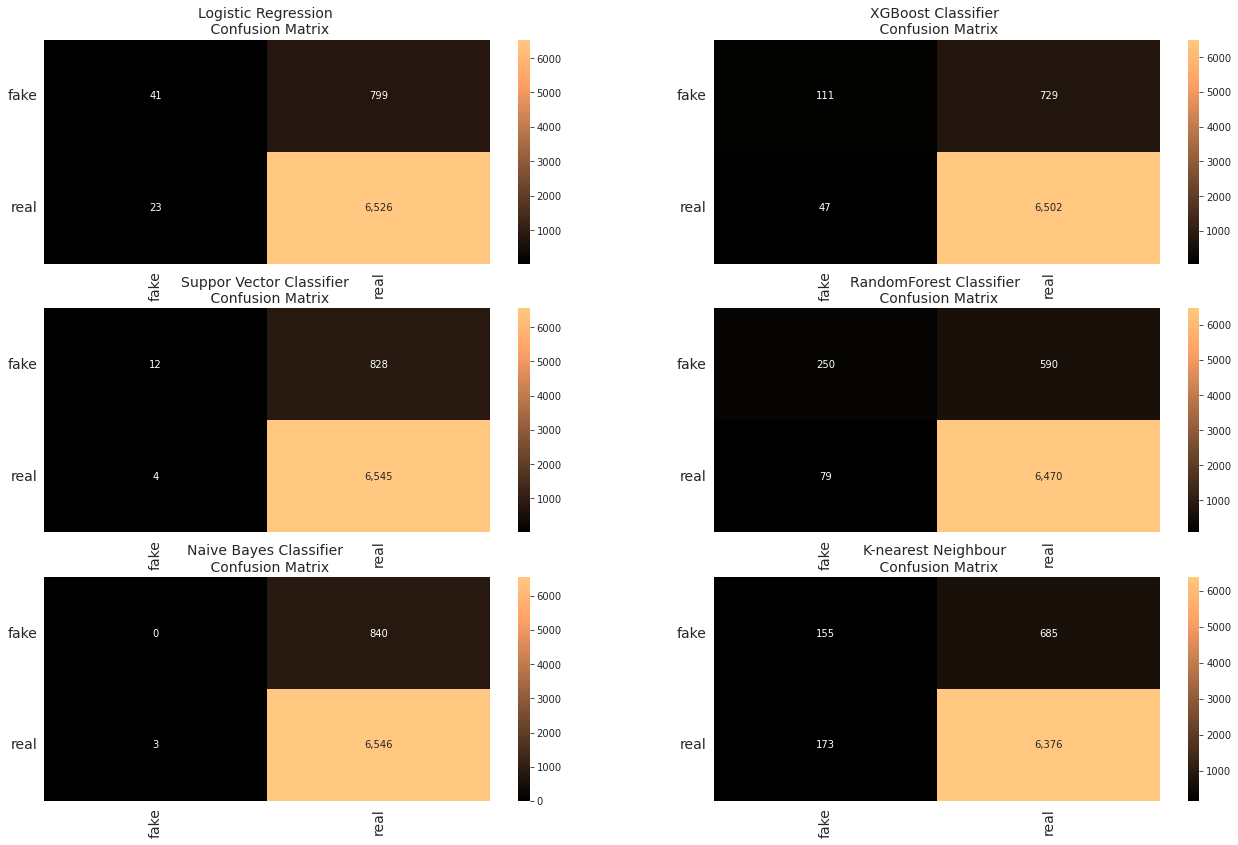

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

log_reg_cf = confusion_matrix(ym_test, Y_pred_lr)
svc_cf = confusion_matrix(ym_test, Y_pred_svm)
nb_cf = confusion_matrix(ym_test, Y_pred_nb)
xgb_cf = confusion_matrix(ym_test, Y_pred_xgb)
tree_cf = confusion_matrix(ym_test, y_pred_ran)
knn_cf = confusion_matrix(ym_test, Y_pred_knn)

fig, ax = plt.subplots(3, 2,figsize=(22,14))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper,  fmt=',d')
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['fake', 'real'], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['fake', 'real'], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper,  fmt=',d')
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['fake', 'real'], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['fake', 'real'], fontsize=14, rotation=360)

sns.heatmap(nb_cf, ax=ax[2][0], annot=True, cmap=plt.cm.copper, fmt=',d')
ax[2][0].set_title("Naive Bayes Classifier \n Confusion Matrix", fontsize=14)
ax[2][0].set_xticklabels(['fake', 'real'], fontsize=14, rotation=90)
ax[2][0].set_yticklabels(['fake', 'real'], fontsize=14, rotation=360)

sns.heatmap(xgb_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper, fmt=',d')
ax[0][1].set_title("XGBoost Classifier \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['fake', 'real'], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['fake', 'real'], fontsize=14, rotation=360)


sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper, fmt=',d')
ax[1][1].set_title("RandomForest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['fake', 'real'], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['fake', 'real'], fontsize=14, rotation=360)

sns.heatmap(knn_cf, ax=ax[2][1], annot=True, cmap=plt.cm.copper, fmt=',d')
ax[2][1].set_title("K-nearest Neighbour \n Confusion Matrix", fontsize=14)
ax[2][1].set_xticklabels(['fake', 'real'], fontsize=14, rotation=90)
ax[2][1].set_yticklabels(['fake', 'real'], fontsize=14, rotation=360)

plt.show()


In [ ]:
lr_acc = accuracy_score(ym_test,Y_pred_lr)
lr = pd.DataFrame([lr_acc], columns = ['Logistic Regression'])
svm_acc = accuracy_score(ym_test,Y_pred_svm)
svm = pd.DataFrame([svm_acc], columns = ['Support Vector Machine'])
nb_acc = accuracy_score(ym_test, Y_pred_nb)
nb = pd.DataFrame([nb_acc], columns = ['Naive Bayes'])
xg_acc = accuracy_score(ym_test,Y_pred_xgb)
xg = pd.DataFrame([xg_acc], columns = ['XGBoost'])
ran_acc = accuracy_score(ym_test,y_pred_ran)
ran = pd.DataFrame([ran_acc], columns = ['Random Forest'])
knn_acc = accuracy_score(ym_test,Y_pred_knn)
knn = pd.DataFrame([knn_acc], columns = ['K-nearest Neighbour'])

In [ ]:
model_comp = pd.concat([lr,svm,nb,xg,ran,knn], axis = 1)
model_comp

,Logistic Regression,Support Vector Machine,Naive Bayes,XGBoost,Random Forest,K-nearest Neighbour
0,0.888754,0.8874,0.885911,0.894979,0.90946,0.883881


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

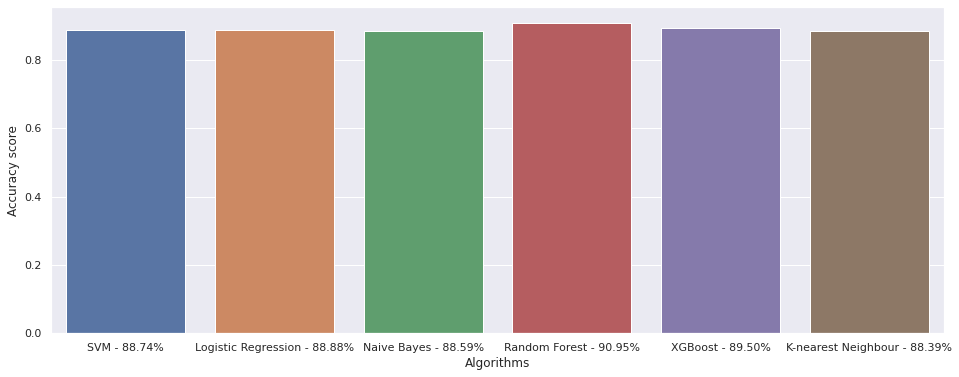

In [ ]:
# svm_acc=svm_acc*100
# lr_acc*=100
# nb_acc*=100
# ran_acc*=100
# xg_acc*=100
al_svm = "SVM - "+str("{:.2f}".format(svm_acc*100))+"%"
al_lr = "Logistic Regression - "+str("{:.2f}".format(lr_acc*100))+"%"
al_nb = "Naive Bayes - "+str("{:.2f}".format(nb_acc*100))+"%"
al_rf = "Random Forest - "+str("{:.2f}".format(ran_acc*100))+"%"
al_xg = "XGBoost - "+str("{:.2f}".format(xg_acc*100))+"%"
al_knn = "K-nearest Neighbour - "+str("{:.2f}".format(knn_acc*100))+"%"

scores2 = [svm_acc,lr_acc,nb_acc,ran_acc,xg_acc,knn_acc]
algorithms = [al_svm,al_lr,al_nb,al_rf,al_xg,al_knn] 
sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(x=algorithms, y=scores2)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores2)

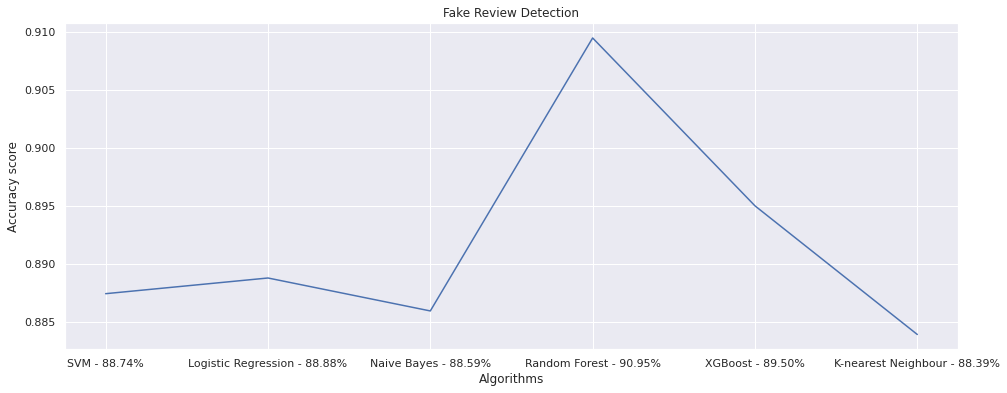

In [ ]:
# Create line plot
sns.lineplot(x=algorithms, y=scores2)
# Add title and axis labels
plt.title("Fake Review Detection")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Show plot
plt.show()